# Data Science Blog Post Based on FIFA_19 Data


# 1. Business Understanding

I chosen the FIFA 2019 complete players dataset of 18k+ Rows And ~90 attributes extracted from Kaggle to analyse and solve the following questions by following CRISP-DM Process.

  1. Age distribution among the players in this FIFA_19 dataset.
  2. What are the best clubs according to the given dataset based upon player's present market value.
  3. The country with most number of foodball players in FIFA_2019 dataset.
  4. Correlation between Some of the attributes like Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage

Understanding this dataset with the following questions may give the basic idea about how the each club and player based upon their skillset 




In [15]:
# importing the necessary libraries
import numpy as np
import pandas as pd


import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Data Understanding

Some of the basic operations perfomed using pandas to understand the given dataset.

In [2]:
# Read in the Complete Dataset
Complete_fifa_19_Dataset = pd.read_csv('./fifa_data.csv')
Complete_fifa_19_Dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [25]:
Complete_fifa_19_Dataset.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [16]:
Complete_fifa_19_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [26]:
num_rows=Complete_fifa_19_Dataset.shape[0]
num_cols=Complete_fifa_19_Dataset.shape[1]
print("Total number of rows: {}".format(num_rows))
print("Total number of Columns number: {}".format(num_cols))

Total number of rows: 18207
Total number of Columns number: 89


In [27]:
Complete_fifa_19_Dataset.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [28]:
Complete_fifa_19_Dataset.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

#  3. Prepare Data

In this process we need to do some necessary steps to proceed with furthur exploration of data.
   1. Dropping the unused columns like images and url links
   2. One-Hot Encoding for Categorical variables
   3. Converting all the String values to number
   4. Handling the missing values in the dataset
    

##  Dropping the unused columns in the dataframe Complete_fifa_19_Dataset

In [3]:
#Dropping the unused columns like images and url links
columns_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo']

Complete_fifa_19_Dataset.drop(columns_to_drop,axis=1,inplace=True)

Complete_fifa_19_Dataset.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [33]:
Complete_fifa_19_Dataset.Value.head()

0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
Name: Value, dtype: object

In [34]:
Complete_fifa_19_Dataset.Wage.head()

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

## Converting all the String values to number

In [4]:
# Supporting function to convert string values into numbers
def str_to_number(column):
    """
    This function perform convertion from string to number
    
    Parameter:
    column(str): M- Million and K- Thousand
    
    Returns:
    float: A float number represents the numerical value of the input 
    """
    if column[-1] == 'M':
        return float(column[1:-1])*1000000
    elif column[-1] == 'K':
        return float(column[1:-1])*1000
    else:
        return float(column[1:])

In [5]:
# Create New Wage_Number column to store numerical type Wage info
Complete_fifa_19_Dataset['Wage_Number']  = Complete_fifa_19_Dataset['Wage'].map(lambda x: str_to_number(x))

#Create New Value_Number column to store numerical type Value info
Complete_fifa_19_Dataset['Value_Number'] = Complete_fifa_19_Dataset['Value'].map(lambda x: str_to_number(x))

## One-Hot Encoding for Categorical variables

In [6]:
Complete_fifa_19_Dataset['Position'].str.split().str[0]

# Select only one preferred position (first one) and stored in New 'Preferred Position' column
Complete_fifa_19_Dataset['Preferred Position'] = Complete_fifa_19_Dataset['Position'].str.split().str[0]

# One-hot encode the feature: "Club" , "Nationality" and "Preferred Position"
le = LabelEncoder()
Complete_fifa_19_Dataset['Club_onehot_encode']               = le.fit_transform(Complete_fifa_19_Dataset['Club'].astype(str))
Complete_fifa_19_Dataset['Nationality_onehot_encode']        = le.fit_transform(Complete_fifa_19_Dataset['Nationality'].astype(str))
Complete_fifa_19_Dataset['Preferred_Position_onehot_encode'] = le.fit_transform(Complete_fifa_19_Dataset['Preferred Position'].astype(str))

## Handling the missing values in the dataset

In [58]:
Complete_fifa_19_Dataset.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Wage_Number,Value_Number,Club_onehot_encode,Nationality_onehot_encode,Preferred_Position_onehot_encode
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,16.616223,16.391596,16.232061,16.388898,16.710887,9731.312133,2.410696e+06,328.786785,76.136156,11.401878
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,17.695349,16.906900,16.502864,17.034669,17.955119,21999.290406,5.594933e+06,190.473968,47.834069,8.831451
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,1000.000000,3.000000e+05,164.000000,35.000000,4.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,3000.000000,6.750000e+05,329.000000,59.000000,8.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,9000.000000,2.000000e+06,493.000000,123.000000,19.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,90.000000,92.000000,91.000000,90.000000,94.000000,565000.000000,1.185000e+08,651.000000,163.000000,27.000000


In [59]:
# Missing value handling
missing_player_fifa_19_Dataset = Complete_fifa_19_Dataset[Complete_fifa_19_Dataset['Agility'].isnull()]
missing_player_fifa_19_Dataset.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Wage_Number,Value_Number,Club_onehot_encode,Nationality_onehot_encode,Preferred_Position_onehot_encode
count,48.000000,48.0,48.000000,48.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,48.000000,48.000000,48.000000,48.000000,48.0
mean,25.000000,62.0,66.833333,1562.229167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1687.500000,354375.000000,298.229167,70.375000,27.0
std,4.472136,0.0,5.272705,127.956981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,992.659227,117353.915526,180.285617,45.161943,0.0
min,17.000000,62.0,62.000000,1141.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1000.000000,100000.000000,16.000000,1.000000,27.0
25%,22.000000,62.0,62.000000,1506.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1000.000000,300000.000000,138.250000,30.750000,27.0
50%,25.000000,62.0,65.500000,1576.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1000.000000,337500.000000,289.000000,57.000000,27.0
75%,27.000000,62.0,70.000000,1664.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2000.000000,425000.000000,411.500000,115.250000,27.0
max,37.000000,62.0,82.000000,1740.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5000.000000,650000.000000,651.000000,160.000000,27.0



We can see that quite a few columns which are related to players' skills got 48 missing values.

So there were 48 players that simply missing these values.

But we will reserve those players for some of the questions, since there were no missing value in Wage_Number and Value_Number columns. Based upon the question requiremet i will perform droping of unused columns.

## Solving the above mentioned questions with missing_player_fifa_19_Dataset

### Q1.Age distribution among the players in this FIFA_19 dataset.

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
Name: Age, dtype: int64


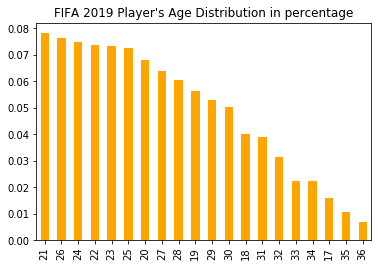

In [7]:

player_age_vals = Complete_fifa_19_Dataset.Age.value_counts()
print(player_age_vals.head(20))

(player_age_vals.head(20)/Complete_fifa_19_Dataset.shape[0]).plot(kind="bar",color='Orange');
plt.title("FIFA 2019 Player's Age Distribution in percentage");

This bar chart clearly showing that the dataset contains the most of the players with the age between 20-25, Which can be consider as best because, The age bellow 20 players are not enough chances to prove them selfs and lack of experience also consider them as not fit for the tornaments. And the age above 28 players are about to retire from the foodball field, So the bar chart going down for them. 


### Q2. What are the best clubs according to the given dataset based upon player's present market value.

In [8]:
#Here i'm going to show top 15 clubs 

Value_Wage_df = Complete_fifa_19_Dataset[["Name", "Club", "Value_Number", "Wage_Number"]]
Value_Wage_df.head()

,Name,Club,Value_Number,Wage_Number
0,L. Messi,FC Barcelona,110500000.0,565000.0
1,Cristiano Ronaldo,Juventus,77000000.0,405000.0
2,Neymar Jr,Paris Saint-Germain,118500000.0,290000.0
3,De Gea,Manchester United,72000000.0,260000.0
4,K. De Bruyne,Manchester City,102000000.0,355000.0


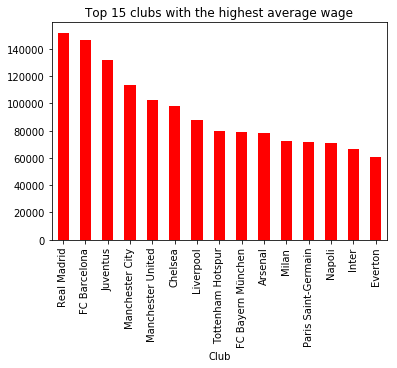

In [9]:
# Finding out the top 15 clubs with the highest average wage
Value_Wage_df.groupby("Club")["Wage_Number"].mean().sort_values(ascending=False).head(15).plot(kind="bar",color='Red');
plt.title("Top 15 clubs with the highest average wage");

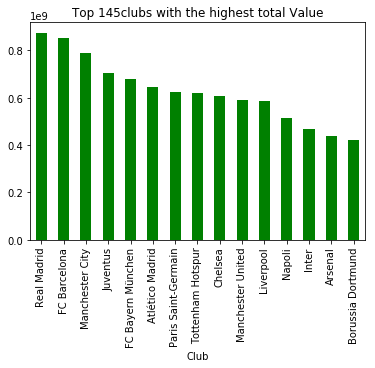

In [10]:
# Finding out the top 15 clubs with the highest total player market value


Value_Wage_df.groupby("Club")["Value_Number"].sum().sort_values(ascending=False).head(15).plot(kind="bar",color='Green');
plt.title("Top 15 clubs with the highest total Value");

Players of Real Madrid, FC BArcelona, Manchester City and Juventus are having the most valuable players(who's earning is far bestter then other clubs), So these are the clubs consider as top in this dataset.  

### Q3. The country with most number of foodball players in FIFA_2019 dataset.

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Name: Nationality, dtype: int64


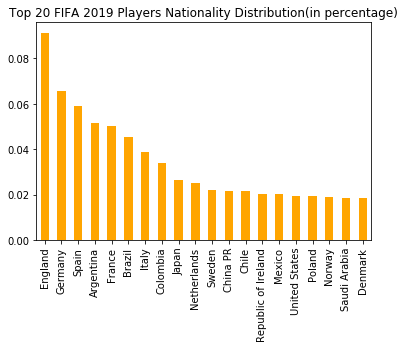

In [11]:
# Here i'm listing the top 20 Nations with highest number of players
country_vals = Complete_fifa_19_Dataset.Nationality.value_counts()
print(country_vals.head(20))

(country_vals.head(20)/Complete_fifa_19_Dataset.shape[0]).plot(kind="bar",color='Orange');

plt.title("Top 20 FIFA 2019 Players Nationality Distribution(in percentage)");

From the bar chart we can clearly conclude that most of the valuable players are coming from the top 7 countries in this bar chart. Due to EPL(English premier leauge) and LALIGA in Europe almost 40% of the dats set players belonged to this tornaments. Due to encoragment and organising tornaments like EPL, Germany Leauge and LALIGA the contries like England,Germany and Spain in the top list. 

#### Q4. Correlation between Some of the attributes like Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage

In [13]:
#Selecting the selected attributes for showing correlation between the attributes

Correlation_DF = Complete_fifa_19_Dataset[['Name', 'Age', 'Overall', 'Potential', 'Preferred_Position_onehot_encode', 'Club_onehot_encode', 'Nationality_onehot_encode', 'Special', 'Value_Number', 'Wage_Number']]

Correlation_DF.corr()

,Age,Overall,Potential,Preferred_Position_onehot_encode,Club_onehot_encode,Nationality_onehot_encode,Special,Value_Number,Wage_Number
Age,1.000000,0.452350,-0.253312,-0.001042,0.001995,-0.030824,0.236695,0.075022,0.141145
Overall,0.452350,1.000000,0.660939,0.063312,0.004888,-0.011851,0.606960,0.627085,0.571926
Potential,-0.253312,0.660939,1.000000,0.024432,-0.009493,0.007352,0.383727,0.576218,0.486413
Preferred_Position_onehot_encode,-0.001042,0.063312,0.024432,1.000000,0.003737,-0.007693,0.201667,0.047040,0.041511
Club_onehot_encode,0.001995,0.004888,-0.009493,0.003737,1.000000,0.008392,0.001655,-0.001411,-0.019516
Nationality_onehot_encode,-0.030824,-0.011851,0.007352,-0.007693,0.008392,1.000000,-0.005249,-0.009965,-0.020944
Special,0.236695,0.606960,0.383727,0.201667,0.001655,-0.005249,1.000000,0.377738,0.347835
Value_Number,0.075022,0.627085,0.576218,0.047040,-0.001411,-0.009965,0.377738,1.000000,0.858442
Wage_Number,0.141145,0.571926,0.486413,0.041511,-0.019516,-0.020944,0.347835,0.858442,1.000000


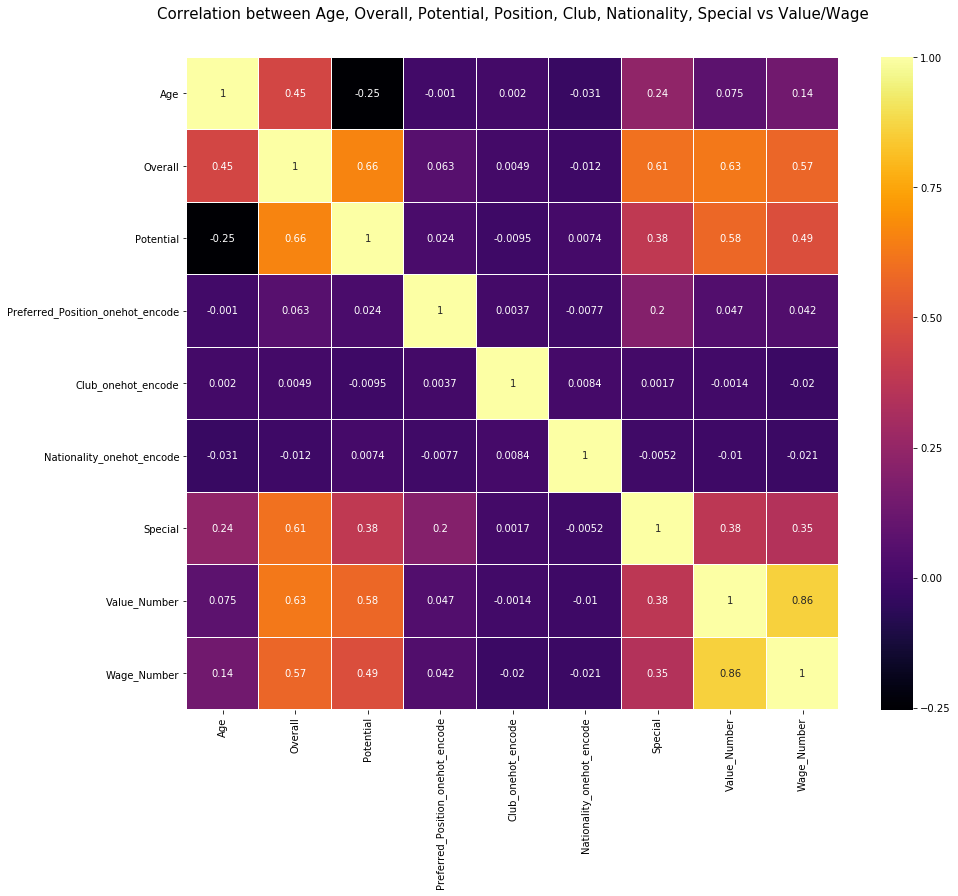

In [18]:
#corrmap = plt.cm.inferno
plt.figure(figsize=(15,12))
plt.title('Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage', y=1.05, size=15)
sns.heatmap(Correlation_DF.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.inferno, linecolor='white', annot=True)

From the above correlation heat map we can conclude that valueNumber and Wage_Number having positive correlation with highest value 0.86, Then the attributes Overall and potential are having 2nd highest positive correlation of value 0.66. Moreover, Club, Nationality and Position are not so important features that relate to the Wage & Value. Besides that, we can also find that Wage and Value are highly correlated to each other, which is quite reasonable.